# Heart failure Prediction

- Dataset :
    - There are two datasets named train & test
    - In train dataset there are 2000 moblies and their features.
    - These samples have prices which we know them as target.
    - The target values are classified into 4 classes.
    - Also in test dataset there are some sample without price column which i'm going to predict their prices.
- Models :
    - I want to train my data with 3 classification algorithms which are :
    - Decision tree
    - Random forest
    - SVM (Support Vector Machine)

# Importing data & libraries

In [42]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from scipy import stats
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

import warnings
warnings.filterwarnings ('ignore')

sns.set(style="whitegrid")

In [3]:
# import and transform the dataset to dataframe 
data = pd.read_csv ("C:\\Users\\karel\\Downloads\\heart_failure_clinical_records_dataset.csv")
df = pd.DataFrame (data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Preprocessing

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [4]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


There are no missing values and duplicated rows, so the the data is already quite clean.

# Visualization and EDA

in scatter plot of all columns we can see :
- behavior of features with target
- range of our feature (in numerical fetures)
- classes of our features (in categorical fetures)
- etc.

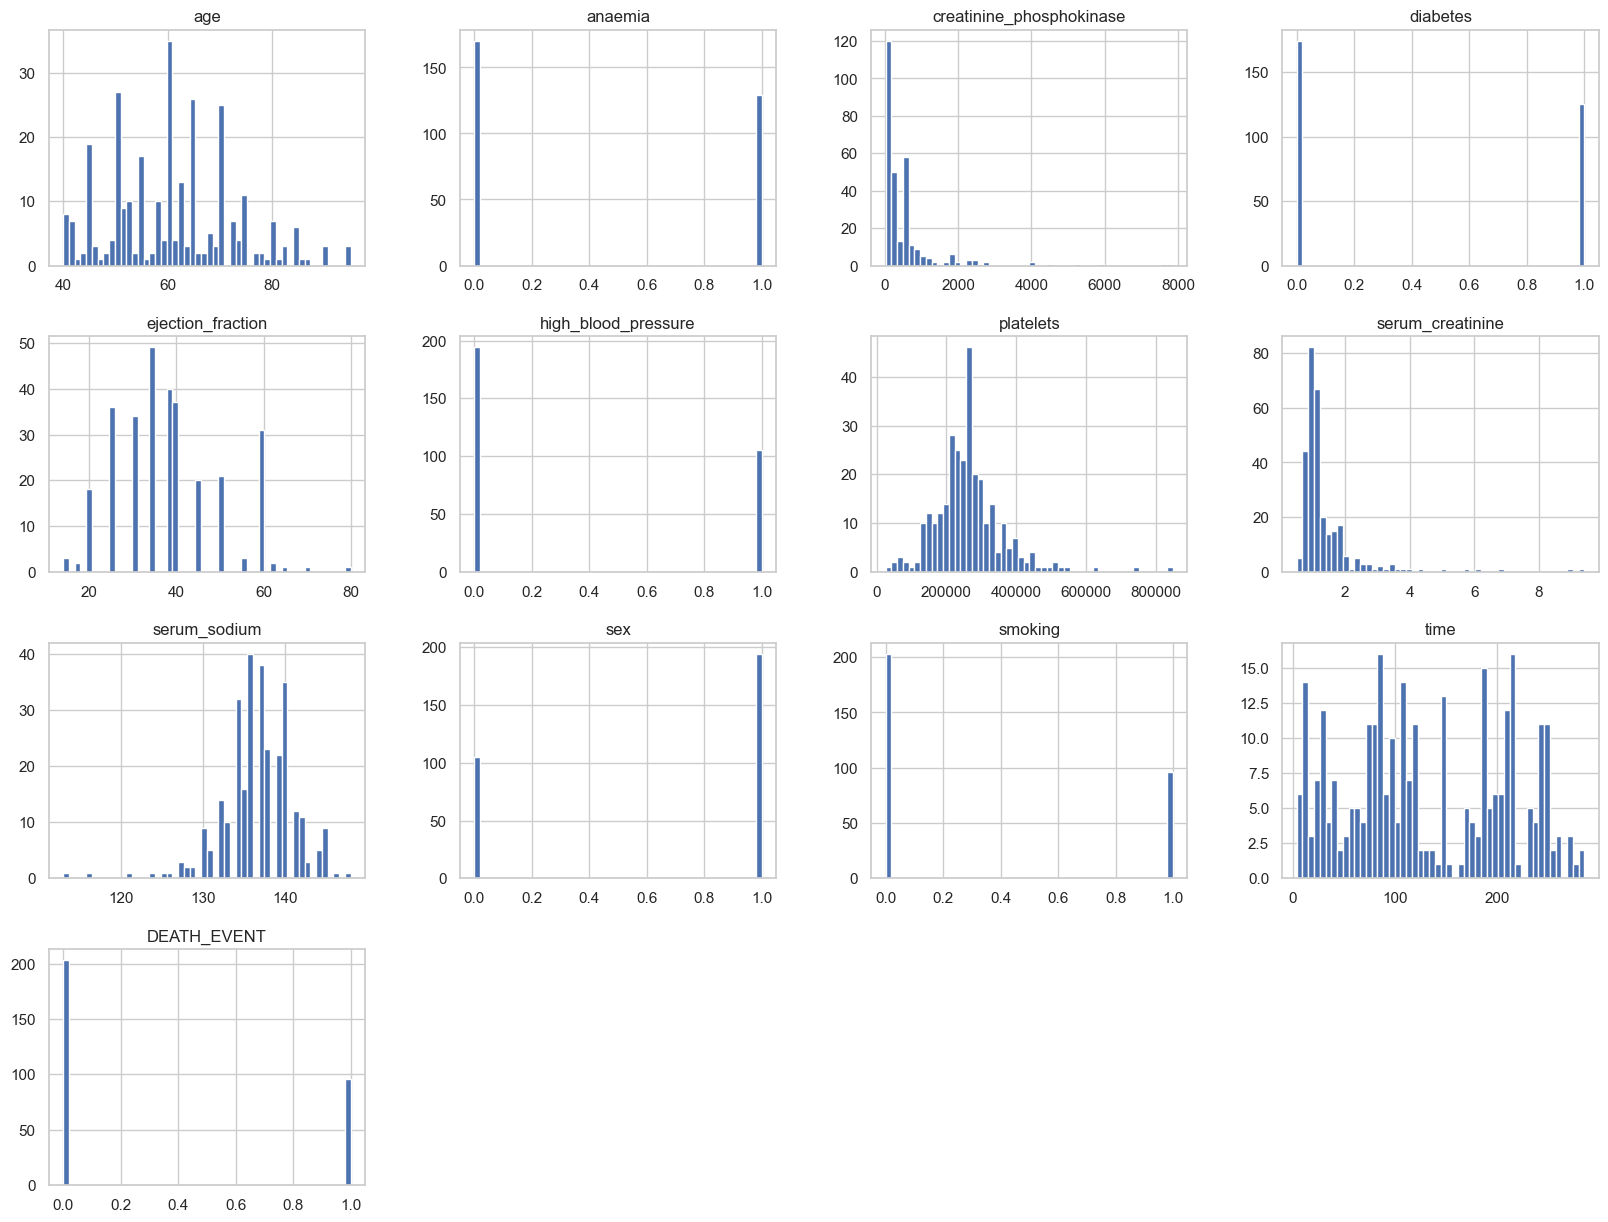

In [10]:
df.hist(bins=50,figsize=(20,15))    # hist for checking distribution
plt.show()

# Check Correlation and which to drop

At last you can see count of predicted samples and their labels.

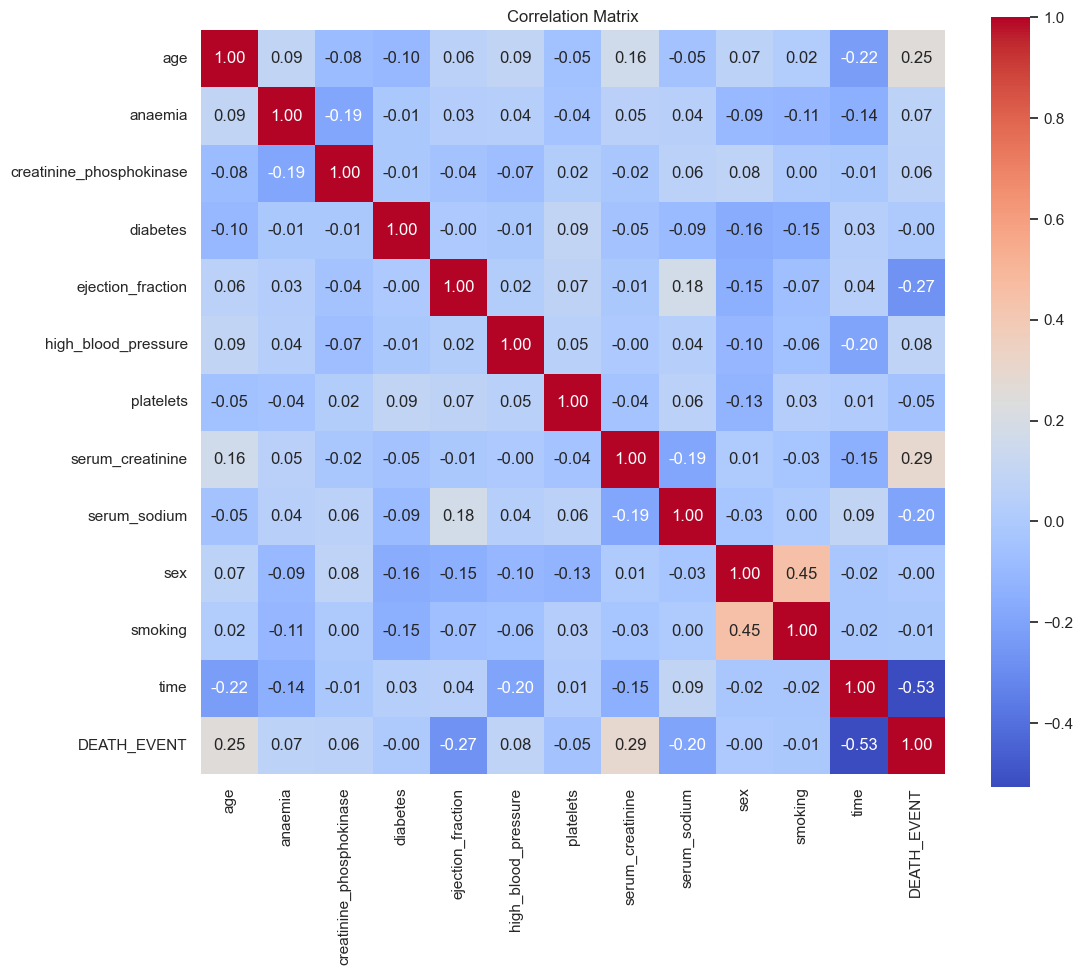

Highly correlated pairs: []
                     Feature  Importance
11                      time    0.344041
7           serum_creatinine    0.141477
4          ejection_fraction    0.119073
0                        age    0.091657
2   creatinine_phosphokinase    0.087620
6                  platelets    0.081932
8               serum_sodium    0.074636
3                   diabetes    0.012655
9                        sex    0.012531
10                   smoking    0.012523
1                    anaemia    0.011405
5        high_blood_pressure    0.010449


In [15]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated pairs (correlation coefficient > 0.8 or < -0.8)
high_corr_pairs = [(feature1, feature2) for feature1 in corr_matrix.columns for feature2 in corr_matrix.columns if feature1 != feature2 and abs(corr_matrix.at[feature1, feature2]) > 0.8]
print("Highly correlated pairs:", high_corr_pairs)

# Train a Random Forest classifier to get feature importances
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Example decision process for dropping features:
# Suppose 'serum_creatinine' and 'creatinine_phosphokinase' are highly correlated
# If 'serum_creatinine' has higher importance, drop 'creatinine_phosphokinase'

In [16]:
# List of features to drop
features_to_drop = ['high_blood_pressure', 'anaemia', 'smoking', 'sex', 'diabetes']

# Drop the features from the dataset
X_reduced = X.drop(columns=features_to_drop)


In [18]:
X_reduced

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


# Split dataset to Train and test

In [21]:
# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Normalize the reduced data
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Train a Random Forest classifier on the reduced dataset
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced_scaled, y_train)

# Make predictions on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_reduced_scaled)

# Evaluate the model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
class_report_reduced = classification_report(y_test, y_pred_reduced)

# Print evaluation results
print("Reduced Model Accuracy:", accuracy_reduced)
print("Reduced Model Confusion Matrix:\n", conf_matrix_reduced)
print("Reduced Model Classification Report:\n", class_report_reduced)


Reduced Model Accuracy: 0.7
Reduced Model Confusion Matrix:
 [[30  5]
 [13 12]]
Reduced Model Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.71      0.48      0.57        25

    accuracy                           0.70        60
   macro avg       0.70      0.67      0.67        60
weighted avg       0.70      0.70      0.69        60



In [23]:
from xgboost import XGBClassifier

# Train an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_reduced_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_reduced_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print evaluation results
print("XGBoost Model Accuracy:", accuracy_xgb)
print("XGBoost Model Confusion Matrix:\n", conf_matrix_xgb)
print("XGBoost Model Classification Report:\n", class_report_xgb)

XGBoost Model Accuracy: 0.75
XGBoost Model Confusion Matrix:
 [[30  5]
 [10 15]]
XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



# Logistic Regression

In [26]:
# Initialize and train the Logistic Regression model with regularization
log_reg_model = LogisticRegression(random_state=42, penalty='l2', solver='lbfgs', max_iter=1000)
log_reg_model.fit(X_train_reduced_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_reduced_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print evaluation results
print("Logistic Regression Model Accuracy:", accuracy_log_reg)
print("Logistic Regression Model Confusion Matrix:\n", conf_matrix_log_reg)
print("Logistic Regression Model Classification Report:\n", class_report_log_reg)

Logistic Regression Model Accuracy: 0.8
Logistic Regression Model Confusion Matrix:
 [[34  1]
 [11 14]]
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [29]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_reduced_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8537234042553191


In [30]:
# Train the final model with the best parameters
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train_reduced_scaled, y_train)

# Make predictions on the test set
y_pred_final = final_model.predict(X_test_reduced_scaled)

# Evaluate the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)

# Print evaluation results
print("Final Model Accuracy:", accuracy_final)
print("Final Model Confusion Matrix:\n", conf_matrix_final)
print("Final Model Classification Report:\n", class_report_final)

Final Model Accuracy: 0.8
Final Model Confusion Matrix:
 [[33  2]
 [10 15]]
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



Let's not use GrisearchCV, but let's do it manually per parameter

There are 4 parameter to check for Logistic regression:
- Testing Regularization Strength (C)
- Testing Regularization Type (penalty)
- Testing Solver
- Testing Class Weight

In [34]:
# Define the range of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Initialize a list to store results
results = []

for C in C_values:
    # Initialize and train the Logistic Regression model with the current C value
    log_reg_model = LogisticRegression(C=C, random_state=42, max_iter=1000)
    log_reg_model.fit(X_train_reduced_scaled, y_train)
    
    # Make predictions on the test set
    y_pred_log_reg = log_reg_model.predict(X_test_reduced_scaled)
    
    # Evaluate the model
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    results.append((C, accuracy_log_reg))

# Print results
for C, accuracy in results:
    print(f"C: {C}, Accuracy: {accuracy}")


C: 0.01, Accuracy: 0.6333333333333333
C: 0.1, Accuracy: 0.7666666666666667
C: 1, Accuracy: 0.8
C: 10, Accuracy: 0.8
C: 100, Accuracy: 0.8


In [36]:
# Define the regularization types and their compatible solvers
penalties_solvers = {
    'l1': ['liblinear', 'saga'],
    'l2': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'elasticnet': ['saga']
}

# Initialize a list to store results
results = []

# Test each penalty and its compatible solvers
for penalty, solvers in penalties_solvers.items():
    for solver in solvers:
        try:
            log_reg_model = LogisticRegression(C=1, penalty=penalty, solver=solver, random_state=42, max_iter=1000, l1_ratio=0.5 if penalty == 'elasticnet' else None)
            log_reg_model.fit(X_train_reduced_scaled, y_train)
            
            y_pred_log_reg = log_reg_model.predict(X_test_reduced_scaled)
            accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
            results.append((penalty, solver, accuracy_log_reg))
        except Exception as e:
            # Catch any errors and continue
            print(f"Error with penalty={penalty}, solver={solver}: {e}")

# Print results
for penalty, solver, accuracy in results:
    print(f"Penalty: {penalty}, Solver: {solver}, Accuracy: {accuracy}")

Penalty: l1, Solver: liblinear, Accuracy: 0.7833333333333333
Penalty: l1, Solver: saga, Accuracy: 0.7833333333333333
Penalty: l2, Solver: newton-cg, Accuracy: 0.8
Penalty: l2, Solver: lbfgs, Accuracy: 0.8
Penalty: l2, Solver: liblinear, Accuracy: 0.8
Penalty: l2, Solver: sag, Accuracy: 0.8
Penalty: l2, Solver: saga, Accuracy: 0.8
Penalty: elasticnet, Solver: saga, Accuracy: 0.8


In [37]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

results = []

for solver in solvers:
    log_reg_model = LogisticRegression(C=1, penalty='l2', solver=solver, random_state=42, max_iter=1000)
    log_reg_model.fit(X_train_reduced_scaled, y_train)
    
    y_pred_log_reg = log_reg_model.predict(X_test_reduced_scaled)
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    results.append((solver, accuracy_log_reg))

for solver, accuracy in results:
    print(f"Solver: {solver}, Accuracy: {accuracy}")


Solver: newton-cg, Accuracy: 0.8
Solver: lbfgs, Accuracy: 0.8
Solver: liblinear, Accuracy: 0.8
Solver: sag, Accuracy: 0.8
Solver: saga, Accuracy: 0.8


In [38]:
class_weights = [None, 'balanced']

results = []

for class_weight in class_weights:
    log_reg_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', class_weight=class_weight, random_state=42, max_iter=1000)
    log_reg_model.fit(X_train_reduced_scaled, y_train)
    
    y_pred_log_reg = log_reg_model.predict(X_test_reduced_scaled)
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    results.append((class_weight, accuracy_log_reg))

for class_weight, accuracy in results:
    print(f"Class Weight: {class_weight}, Accuracy: {accuracy}")


Class Weight: None, Accuracy: 0.8
Class Weight: balanced, Accuracy: 0.7833333333333333


# Finalize

Final Model Accuracy: 0.8
Final Model Confusion Matrix:
 [[34  1]
 [11 14]]
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Final Model ROC AUC Score: 0.8468571428571429


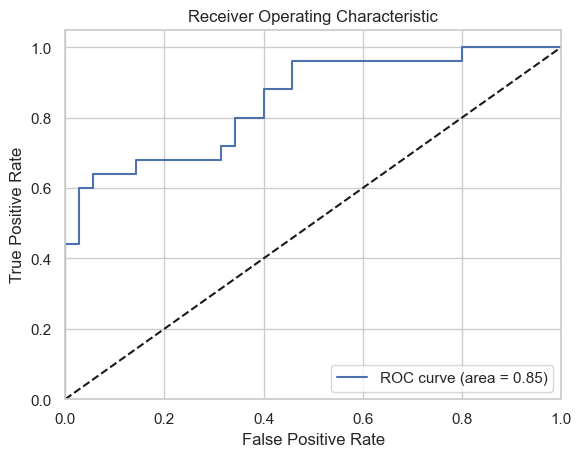

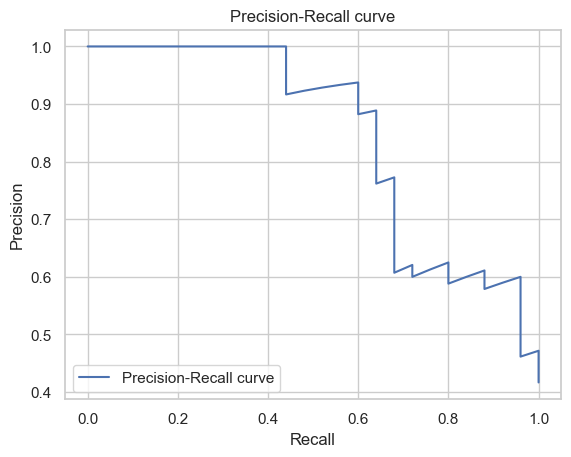

In [43]:
# Finalize the Logistic Regression model with the best parameters found
final_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', class_weight=None, random_state=42, max_iter=1000)
final_model.fit(X_train_reduced_scaled, y_train)

# Evaluate the final model on the test set
y_pred_final = final_model.predict(X_test_reduced_scaled)
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, final_model.predict_proba(X_test_reduced_scaled)[:, 1])

# Print evaluation results
print("Final Model Accuracy:", accuracy_final)
print("Final Model Confusion Matrix:\n", conf_matrix_final)
print("Final Model Classification Report:\n", class_report_final)
print("Final Model ROC AUC Score:", roc_auc_final)

# Save the model and the scaler
joblib.dump(final_model, 'final_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, final_model.predict_proba(X_test_reduced_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_final)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, final_model.predict_proba(X_test_reduced_scaled)[:, 1])
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()